## An Exploratory Analysis of U.S. Gas Prices: Political Influence vs. Market Dynamics

### Data Setup

In [190]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [191]:
# Load data files into data frames
presidents = pd.read_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 530 Data Exploration and Analysis\\Term Project\\Presidents.csv")  
gas_prices = pd.read_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 530 Data Exploration and Analysis\\Term Project\\Gas_Prices.csv")
crude_oil = pd.read_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 530 Data Exploration and Analysis\\Term Project\\Crude_Oil.csv")
cpi_u = pd.read_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 530 Data Exploration and Analysis\\Term Project\\CPI-U.csv")
gdpc = pd.read_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 530 Data Exploration and Analysis\\Term Project\\GDPC.csv")

In [192]:
# Merge df together into one df
merged_df = pd.merge(presidents, gas_prices, on='Year')
merged_df = pd.merge(merged_df, crude_oil, on='Year')
merged_df = pd.merge(merged_df, cpi_u, on='Year')
merged_df = pd.merge(merged_df, gdpc, on='Year')

In [193]:
# Show data frame for merged_df
merged_df

,Year,President,Party,Cost Per Gallon,Inflation Adjuster,Cost Per Gallon (2023 Adjusted),Cost Per Barrell (USD),CPI-U (USD),GDPC1
0,1950,Harry S. Truman,Democratic,0.268,12.28,3.29104,2.51,24.062500,2346.104
1,1951,Harry S. Truman,Democratic,0.272,11.59,3.15248,2.53,25.973333,2593.967
2,1952,Harry S. Truman,Democratic,0.274,11.50,3.15100,2.53,26.566667,2727.954
3,1953,Harry S. Truman,Democratic,0.287,11.41,3.27467,2.68,26.768333,2896.811
4,1953,Dwight D. Eisenhower,Republican,0.287,11.41,3.27467,2.68,26.768333,2896.811
...,...,...,...,...,...,...,...,...,...
82,2020,Donald J. Trump,Republican,2.170,1.18,2.56060,36.86,258.846167,20693.238
83,2021,Donald J. Trump,Republican,3.050,1.10,3.35500,65.84,270.965833,21058.379
84,2021,Joseph R. Biden,Democratic,3.050,1.10,3.35500,65.84,270.965833,21058.379
85,2022,Joseph R. Biden,Democratic,4.094,1.03,4.21682,93.97,292.620583,21903.850


### Plot variables over time

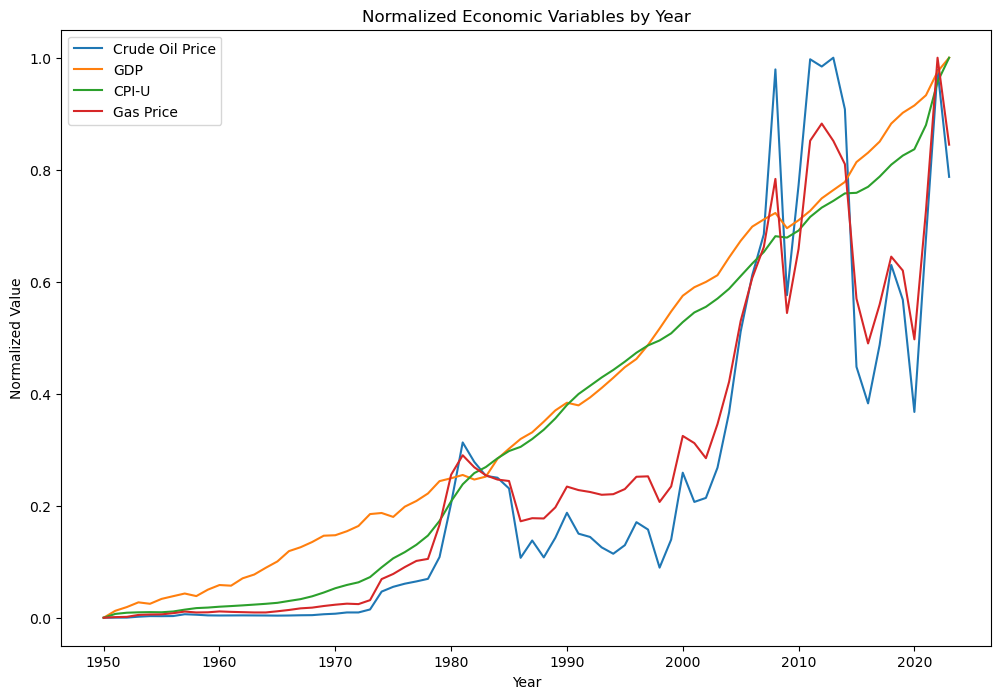

In [195]:
# Normalize each variable to a 0-1 range
merged_df_normalized = merged_df.copy()
merged_df_normalized['Cost Per Barrell (USD)'] = (merged_df['Cost Per Barrell (USD)'] - merged_df['Cost Per Barrell (USD)'].min()) / (merged_df['Cost Per Barrell (USD)'].max() - merged_df['Cost Per Barrell (USD)'].min())
merged_df_normalized['GDPC1'] = (merged_df['GDPC1'] - merged_df['GDPC1'].min()) / (merged_df['GDPC1'].max() - merged_df['GDPC1'].min())
merged_df_normalized['CPI-U (USD)'] = (merged_df['CPI-U (USD)'] - merged_df['CPI-U (USD)'].min()) / (merged_df['CPI-U (USD)'].max() - merged_df['CPI-U (USD)'].min())
merged_df_normalized['Cost Per Gallon'] = (merged_df['Cost Per Gallon'] - merged_df['Cost Per Gallon'].min()) / (merged_df['Cost Per Gallon'].max() - merged_df['Cost Per Gallon'].min())

# Plot the normalized data
plt.figure(figsize=(12, 8))

# Plot each variable by year
plt.plot(merged_df_normalized['Year'], merged_df_normalized['Cost Per Barrell (USD)'], label='Crude Oil Price')
plt.plot(merged_df_normalized['Year'], merged_df_normalized['GDPC1'], label='GDP')
plt.plot(merged_df_normalized['Year'], merged_df_normalized['CPI-U (USD)'], label='CPI-U')
plt.plot(merged_df_normalized['Year'], merged_df_normalized['Cost Per Gallon'], label='Gas Price')

# Add title and labels
plt.title('Normalized Economic Variables by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()


### Summary Statistics

In [197]:
# info on df
merged_df.info()
# Summary Statistics to get a feel for the data
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             87 non-null     int64  
 1   President                        87 non-null     object 
 2   Party                            87 non-null     object 
 3   Cost Per Gallon                  87 non-null     float64
 4   Inflation Adjuster               87 non-null     float64
 5   Cost Per Gallon (2023 Adjusted)  87 non-null     float64
 6   Cost Per Barrell (USD)           87 non-null     float64
 7   CPI-U (USD)                      87 non-null     float64
 8   GDPC1                            87 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.2+ KB


,Year,Cost Per Gallon,Inflation Adjuster,Cost Per Gallon (2023 Adjusted),Cost Per Barrell (USD),CPI-U (USD),GDPC1
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1986.310345,1.295989,4.757241,3.152473,25.364368,121.788632,10122.013931
std,21.445610,1.039493,3.806598,0.655325,27.276049,84.742170,5964.140295
min,1950.000000,0.268000,1.000000,1.980330,2.510000,24.062500,2346.104000
25%,1968.500000,0.342500,1.585000,2.657285,3.090000,35.737500,5170.575000
50%,1986.000000,1.108000,2.780000,3.141600,15.400000,109.691667,8749.127000
75%,2004.500000,2.011000,8.395000,3.344050,36.815000,192.087500,15546.703500
max,2023.000000,4.094000,12.280000,4.882960,95.990000,304.700750,22403.435000


### Histogram of each variable

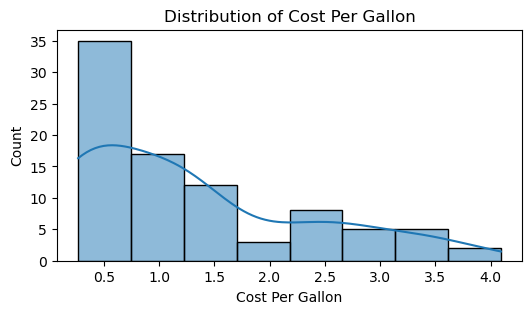

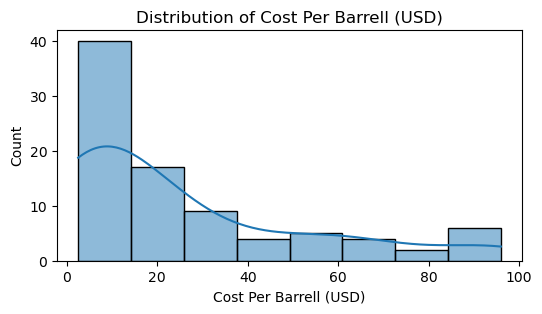

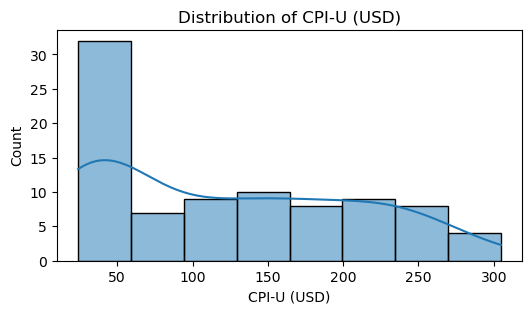

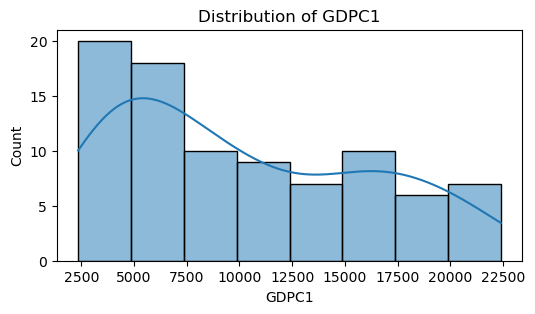

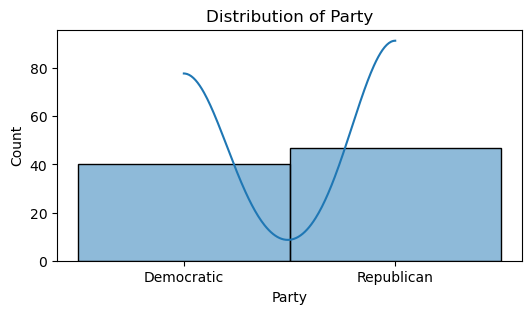

In [199]:
variables = ['Cost Per Gallon', 'Cost Per Barrell (USD)', 'CPI-U (USD)', 'GDPC1', 'Party']
for var in variables:
    plt.figure(figsize=(6, 3))
    sns.histplot(merged_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

* Distribution of Cost Per Gallon: This histogram shows that gas prices were generally low, with most prices concentrated around 0.5 per gallon, making it the most common range in the dataset. The distribution is right-skewed, meaning prices above 1.5 per gallon were less frequent, and very few instances reached over 2.0 per gallon. Overall, the trend suggests that high gas prices were rare, with lower prices being much more common throughout the dataset.
* Distribution of Cost Per Barrell: This histogram shows that the cost per barrel of oil (in USD) was generally low, with most prices clustering around 10 to 20. The distribution is right-skewed, with very few instances of high prices above 50 per barrel. The smooth curve (KDE line) illustrates that the frequency of higher prices gradually decreases, confirming that low barrel costs were much more common in the dataset, with only occasional spikes to higher values.
* Distribution of CPI-U (USD): This histogram shows that the Consumer Price Index for All Urban Consumers (CPI-U) values (in USD) are mostly concentrated at lower levels, with the highest count around 50. The distribution is right-skewed, with CPI-U values gradually decreasing in frequency as they increase. This indicates that lower CPI-U values were more common in the dataset, while higher values above 200 were relatively rare. The KDE line further supports this trend, showing a steady decline in frequency as CPI-U values rise.
* This histogram illustrates the distribution of real GDP per capita (GDPC1) values in the dataset. The data shows a concentration of values between 2,500 and 7,500, with the highest frequency around $2,500. As GDP per capita values increase, their frequency generally decreases, although there is a slight uptick around 15,000. The KDE line reflects this trend, indicating that lower GDP per capita values were more common, while higher values above 15,000 were less frequent. This right-skewed pattern suggests that the dataset primarily includes lower GDP per capita values, with fewer instances of higher economic output per person.
* This histogram shows the distribution of observations by political party in the dataset. The counts for Democratic and Republican terms are relatively balanced, with around 40-50 occurrences for each party. The histogram itself provides a clear count comparison, indicating that the dataset has a similar number of Democratic and Republican terms, which should help ensure balanced comparisons in analyses by party.

In summary, these histograms collectively show that most economic variables in the dataset are right-skewed, with lower values more frequently observed across gas prices, oil prices, CPI, and GDP per capita. The balanced representation of political parties allows for reliable comparisons between Democratic and Republican terms across these economic factors.

### Calculate Descriptive Statistics

In [202]:
for var in variables:
    if pd.api.types.is_numeric_dtype(merged_df[var]):
        print(f'{var} Statistics:')
        print(f'Mean: {merged_df[var].mean()}')
        print(f'Median: {merged_df[var].median()}')
        print(f'Mode: {merged_df[var].mode()[0]}')
        print(f'Standard Deviation: {merged_df[var].std()}')
        print(f'Skewness: {merged_df[var].skew()}\n')
    else:
        print(f'Skipping non-numeric column: {var}')

Cost Per Gallon Statistics:
Mean: 1.2959885057471263
Median: 1.108
Mode: 0.304
Standard Deviation: 1.039492793293059
Skewness: 0.946121687804692

Cost Per Barrell (USD) Statistics:
Mean: 25.364367816091946
Median: 15.4
Mode: 2.89
Standard Deviation: 27.27604881282996
Skewness: 1.3025690407764008

CPI-U (USD) Statistics:
Mean: 121.78863218413794
Median: 109.6916667
Mode: 26.76833333
Standard Deviation: 84.7421696056677
Skewness: 0.3975230131555494

GDPC1 Statistics:
Mean: 10122.013931034482
Median: 8749.127
Mode: 2896.811
Standard Deviation: 5964.140294876098
Skewness: 0.47556772931063007

Skipping non-numeric column: Party


This dataset provides statistical insights into four economic variables: gas price per gallon, oil price per barrel, CPI-U, and real GDP per capita (GDPC1). The average gas price is around 1.30 per gallon, with a right-skewed distribution (skewness = 0.95), indicating that prices tend to be low but with occasional higher values. Oil prices per barrel have a higher mean of 25.36, but with a substantial standard deviation and higher skewness (1.30), reflecting a broader spread and more frequent high prices. The Consumer Price Index (CPI-U) has a mean of 121.79 and is moderately right-skewed (0.40), suggesting that most values are below this average. Lastly, GDP per capita (GDPC1) averages around 10,122, with a moderate skewness of 0.48, indicating that while most GDP values are below this mean, there are occasional high values. Each variable exhibits some degree of right skew, showing that the dataset captures a variety of economic conditions, often with more instances of lower values and some higher outliers.

### Probability Mass Function (PMF) for Scenario Comparison

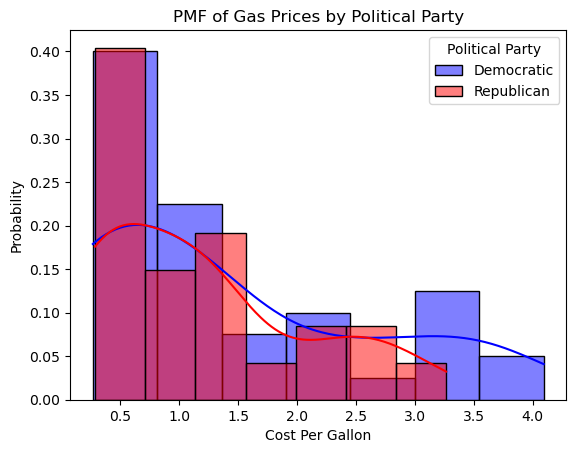

In [205]:
# Separate the data based on political party
gas_price_dem = merged_df[merged_df['Party'] == 'Democratic']['Cost Per Gallon']
gas_price_rep = merged_df[merged_df['Party'] == 'Republican']['Cost Per Gallon']

# Plot the histograms
sns.histplot(gas_price_dem, stat='probability', label='Democratic', color='blue', kde=True)
sns.histplot(gas_price_rep, stat='probability', label='Republican', color='red', kde=True)

# Add title and legend
plt.title('PMF of Gas Prices by Political Party')
plt.xlabel('Cost Per Gallon')
plt.ylabel('Probability')
plt.legend(title='Political Party')
plt.show()


Notes: This plot shows how gas prices were distributed under Democratic and Republican terms. During Democratic terms, gas prices tended to cluster at lower levels, with a noticeable peak around $0.5 per gallon, suggesting they were generally lower. On the other hand, prices during Republican terms were more spread out, with a higher chance of seeing moderate to higher prices. While this might indicate a pattern of lower prices under Democrats, it’s worth noting that other outside factors likely played a role, so we’d need statistical tests to see if these differences are actually significant.

### Cumulative Distribution Function (CDF)

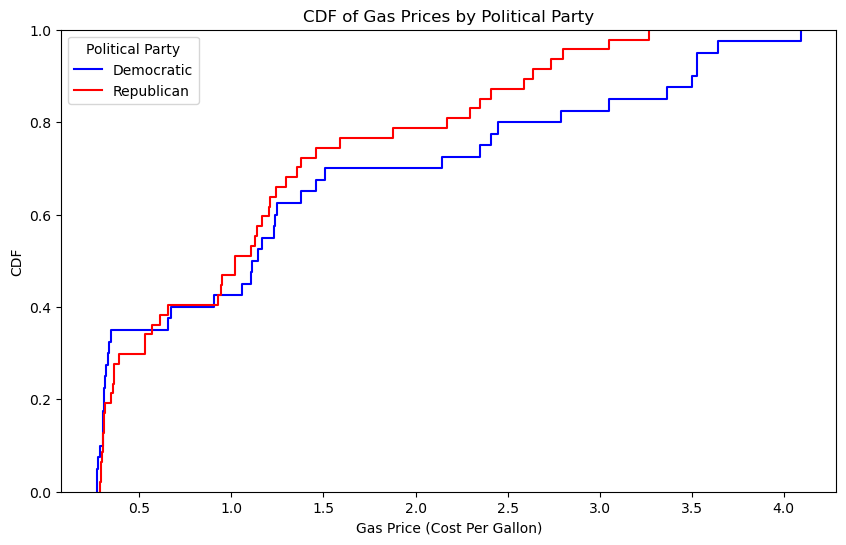

In [208]:
# Separate gas prices by political party
gas_price_dem = merged_df[merged_df['Party'] == 'Democratic']['Cost Per Gallon']
gas_price_rep = merged_df[merged_df['Party'] == 'Republican']['Cost Per Gallon']

# Plot the CDFs
plt.figure(figsize=(10, 6))

# Plot CDF for Democratic terms
sns.ecdfplot(gas_price_dem, label='Democratic', color='blue')

# Plot CDF for Republican terms
sns.ecdfplot(gas_price_rep, label='Republican', color='red')

# Add labels and legend
plt.title('CDF of Gas Prices by Political Party')
plt.xlabel('Gas Price (Cost Per Gallon)')
plt.ylabel('CDF')
plt.legend(title='Political Party')
plt.show()


This CDF plot compares gas prices during Democratic and Republican terms, highlighting differences in how prices were distributed under each party. The red line, representing Republican terms, rises faster at lower gas prices, indicating that lower prices were more common under Republican administrations. In contrast, the blue line, representing Democratic terms, starts to catch up around 1.5 per gallon and overtakes the Republican line at higher prices, suggesting that higher gas prices were more likely under Democratic administrations. Overall, this pattern suggests a tendency for gas prices to be generally lower during Republican terms and higher during Democratic terms, though the differences aren’t drastic. This CDF plot provides a clear, cumulative comparison of gas prices by party

### Comparing the PMF and CDF results

The discrepancy between the PMF and CDF arises because they highlight different aspects of the gas price distributions under each party. The PMF shows that gas prices under Democratic terms are spread across a broader range, with notable probabilities at both lower and higher prices, suggesting a wider distribution. This gives the impression that Democrats have lower prices due to the presence of low-price bars. However, the CDF captures the cumulative proportion of prices below each level, revealing that Republicans have a higher concentration of low prices overall, as their line rises more quickly at lower values. This means that, while Democrats have some low prices, they also have more high prices compared to Republicans, making Republicans’ gas prices generally lower on a cumulative basis.

### Fit an Analytical Distribution

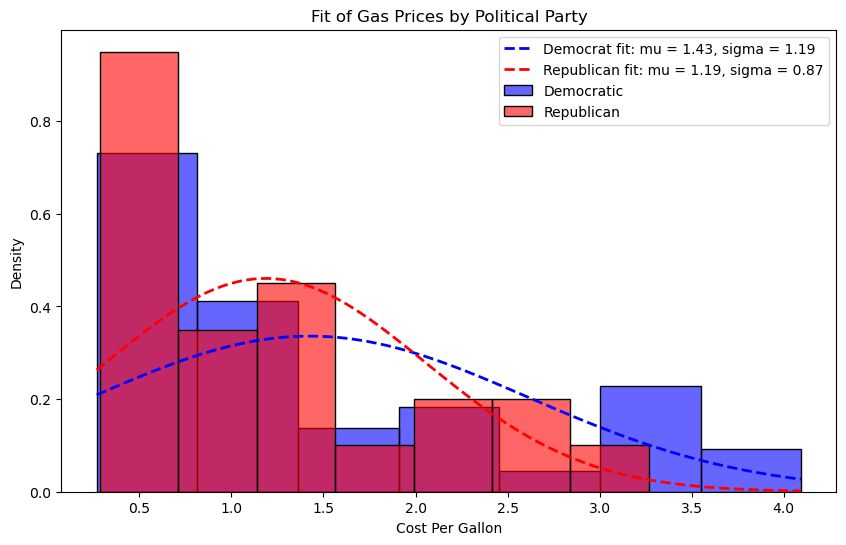

In [213]:
# Separate gas prices by party
gas_price_dem = merged_df[merged_df['Party'] == 'Democratic']['Cost Per Gallon']
gas_price_rep = merged_df[merged_df['Party'] == 'Republican']['Cost Per Gallon']

# Fit a normal distribution to Democratic gas prices
mu_dem, sigma_dem = stats.norm.fit(gas_price_dem)
# Fit a normal distribution to Republican gas prices
mu_rep, sigma_rep = stats.norm.fit(gas_price_rep)

# Set x range for plotting based on data range
xmin = min(gas_price_dem.min(), gas_price_rep.min())
xmax = max(gas_price_dem.max(), gas_price_rep.max())
x = np.linspace(xmin, xmax, 100)

# Calculate PDF values for the fitted distributions
p_dem = stats.norm.pdf(x, mu_dem, sigma_dem)
p_rep = stats.norm.pdf(x, mu_rep, sigma_rep)

# Plot histogram and fitted distributions
plt.figure(figsize=(10, 6))

# Democratic terms histogram and fitted curve
sns.histplot(gas_price_dem, kde=False, stat='density', color='blue', label='Democratic', alpha=0.6)
plt.plot(x, p_dem, 'b--', linewidth=2, label=f'Democrat fit: mu = {mu_dem:.2f}, sigma = {sigma_dem:.2f}')

# Republican terms histogram and fitted curve
sns.histplot(gas_price_rep, kde=False, stat='density', color='red', label='Republican', alpha=0.6)
plt.plot(x, p_rep, 'r--', linewidth=2, label=f'Republican fit: mu = {mu_rep:.2f}, sigma = {sigma_rep:.2f}')

# Labels and title
plt.title('Fit of Gas Prices by Political Party')
plt.xlabel('Cost Per Gallon')
plt.ylabel('Density')
plt.legend()
plt.show()

This plot shows the distribution of gas prices by political party, with fitted normal distributions for Democratic and Republican terms:

* Mean (mu) Comparison: The Democratic gas prices have a slightly higher mean (1.43) than Republican prices (1.19), indicating that gas prices tended to be higher on average during Democratic terms.

* Spread (sigma) Comparison: The standard deviation (sigma) for Democratic gas prices is also higher (1.19) than for Republican prices (0.87), suggesting that Democratic gas prices were more variable, with a wider range of prices.

* Distribution Shapes: The Democratic distribution (blue) has a broader, flatter curve, meaning that gas prices during Democratic terms were more spread out, with both low and high values. In contrast, the Republican distribution (red) is narrower and more peaked, indicating that gas prices under Republican terms were more concentrated around the lower end.

Overall, this plot suggests that gas prices were generally lower and more stable during Republican terms, while Democratic terms saw a wider and slightly higher range of gas prices. This visualization adds depth to understanding party-based differences in gas price distributions.

### Scatter Plots and Correlation Analysis

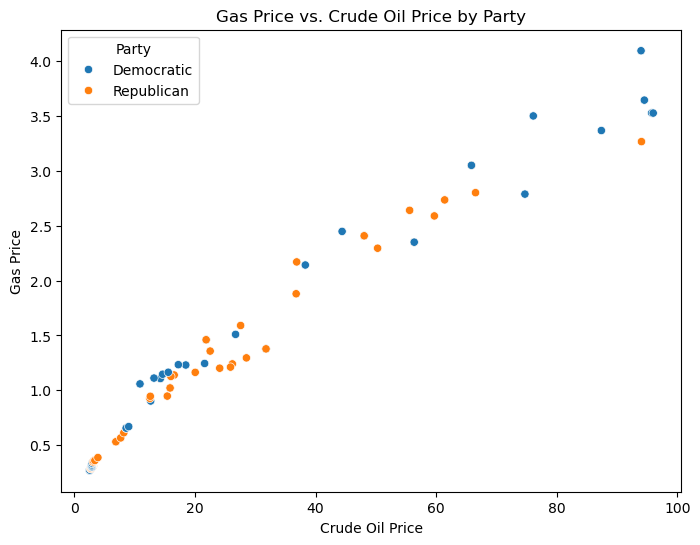

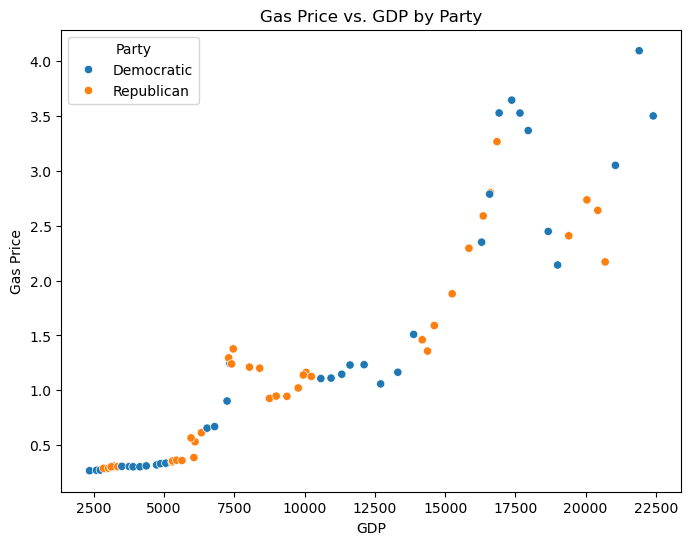

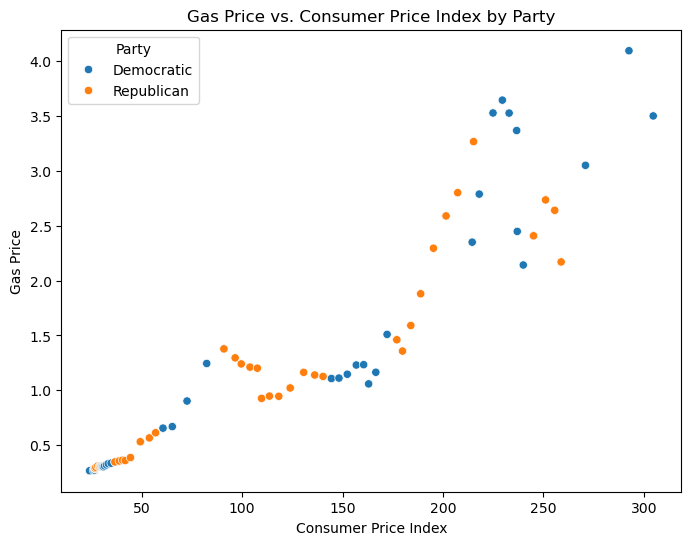

In [216]:
# Scatter Plot 1: Gas Price vs. Crude Oil Price by Party
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Cost Per Barrell (USD)', y='Cost Per Gallon', hue='Party')
plt.title('Gas Price vs. Crude Oil Price by Party')
plt.xlabel('Crude Oil Price')
plt.ylabel('Gas Price')
plt.legend(title='Party')
plt.show()

# Scatter Plot 2: Gas Price vs. GDP by Party
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='GDPC1', y='Cost Per Gallon', hue='Party')
plt.title('Gas Price vs. GDP by Party')
plt.xlabel('GDP')
plt.ylabel('Gas Price')
plt.legend(title='Party')
plt.show()

# Scatter Plot 3: Gas Price vs. Consumer Price Index by Party
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='CPI-U (USD)', y='Cost Per Gallon', hue='Party')
plt.title('Gas Price vs. Consumer Price Index by Party')
plt.xlabel('Consumer Price Index')
plt.ylabel('Gas Price')
plt.legend(title='Party')
plt.show()

#### Scatter Plot Analysis
* Gas Price vs Crude Oil Price by Party: The plot shows a clear positive correlation between gas prices and crude oil prices, with both rising together consistently, regardless of the party in power. However, the color-coding reveals some subtle differences. At lower crude oil prices, there’s a slightly higher concentration of Republican points, suggesting that lower gas prices may have been more common under Republican terms when crude oil prices were also low. As crude oil prices increase, both parties are represented fairly evenly, with some clustering at specific price levels, indicating slight party-based variations in gas prices at particular crude oil price points. Overall, while gas prices strongly follow crude oil prices across both parties, the additional layer of party affiliation provides insight into how these trends might vary slightly with political administration.
* Gas Price vs GDP by Party: The positive correlation indicates that gas prices generally rise with GDP, suggesting that higher economic output is associated with higher gas prices. The color distinctions reveal some interesting patterns by party: at lower GDP levels, both Democratic and Republican terms are represented relatively equally, indicating a similar range of gas prices during periods of lower economic output. However, as GDP increases, Democratic terms (blue) are slightly more prevalent at the highest GDP levels, hinting at a tendency for gas prices to be higher under Democratic administrations when GDP is high. Overall, while gas prices and GDP rise together regardless of the party, the additional layer of party affiliation offers insights into how gas prices may vary slightly with political administration, especially at higher GDP levels.
* Gas Price vs Consumer Price Index by Party: The positive trend indicates that as the CPI increases, gas prices also tend to rise, reflecting inflation's impact on fuel costs. The color-coded data points reveal that, at lower CPI values, both Democratic and Republican terms are represented relatively equally, suggesting that lower gas prices were common under both parties when the CPI was low. However, at higher CPI levels, there’s a slightly larger presence of Democratic data points, particularly in the highest range of gas prices. This may imply that during Democratic terms, gas prices were occasionally higher in periods of elevated CPI, while Republican terms show a more even distribution across mid-to-high CPI levels. Overall, the plot illustrates a general inflationary effect on gas prices, with subtle differences based on political party at higher CPI levels.

#### Pearsons Correlation

In [219]:
from scipy.stats import pearsonr

# Separate data by party
data_dem = merged_df[merged_df['Party'] == 'Democratic']
data_rep = merged_df[merged_df['Party'] == 'Republican']

# Calculate Pearson's correlation for Democrats
pearson_crude_dem, _ = pearsonr(data_dem['Cost Per Barrell (USD)'], data_dem['Cost Per Gallon'])
pearson_gdp_dem, _ = pearsonr(data_dem['GDPC1'], data_dem['Cost Per Gallon'])
pearson_cpi_dem, _ = pearsonr(data_dem['CPI-U (USD)'], data_dem['Cost Per Gallon'])

# Calculate Pearson's correlation for Republicans
pearson_crude_rep, _ = pearsonr(data_rep['Cost Per Barrell (USD)'], data_rep['Cost Per Gallon'])
pearson_gdp_rep, _ = pearsonr(data_rep['GDPC1'], data_rep['Cost Per Gallon'])
pearson_cpi_rep, _ = pearsonr(data_rep['CPI-U (USD)'], data_rep['Cost Per Gallon'])

# Print results
print (f"Democrats _______")
print(f"Pearson's Correlation - Gas Price and Crude Oil Price (Democrats): {pearson_crude_dem:.2f}")
print(f"Pearson's Correlation - Gas Price and GDP (Democrats): {pearson_gdp_dem:.2f}")
print(f"Pearson's Correlation - Gas Price and Consumer Price Index (Democrats): {pearson_cpi_dem:.2f}")
print (f"Republicans _______")
print(f"Pearson's Correlation - Gas Price and Crude Oil Price (Republicans): {pearson_crude_rep:.2f}")
print(f"Pearson's Correlation - Gas Price and GDP (Republicans): {pearson_gdp_rep:.2f}")
print(f"Pearson's Correlation - Gas Price and Consumer Price Index (Republicans): {pearson_cpi_rep:.2f}")

Democrats _______
Pearson's Correlation - Gas Price and Crude Oil Price (Democrats): 0.98
Pearson's Correlation - Gas Price and GDP (Democrats): 0.93
Pearson's Correlation - Gas Price and Consumer Price Index (Democrats): 0.93
Republicans _______
Pearson's Correlation - Gas Price and Crude Oil Price (Republicans): 0.98
Pearson's Correlation - Gas Price and GDP (Republicans): 0.94
Pearson's Correlation - Gas Price and Consumer Price Index (Republicans): 0.95


The results show that the relationships between gas prices and crude oil prices, GDP, and CPI are consistently strong under both Democratic and Republican terms. This implies that external economic factors (like crude oil prices and inflation) strongly drive gas prices, with minimal influence from the political party in power. The slight differences in correlation values are negligible, suggesting that party affiliation does not significantly alter these economic relationships.

#### Covariance

In [222]:
import numpy as np

# Separate data by party
data_dem = merged_df[merged_df['Party'] == 'Democratic']
data_rep = merged_df[merged_df['Party'] == 'Republican']

# Calculate covariance for Democrats
cov_crude_dem = np.cov(data_dem['Cost Per Barrell (USD)'], data_dem['Cost Per Gallon'])[0, 1]
cov_gdp_dem = np.cov(data_dem['GDPC1'], data_dem['Cost Per Gallon'])[0, 1]
cov_cpi_dem = np.cov(data_dem['CPI-U (USD)'], data_dem['Cost Per Gallon'])[0, 1]

# Calculate covariance for Republicans
cov_crude_rep = np.cov(data_rep['Cost Per Barrell (USD)'], data_rep['Cost Per Gallon'])[0, 1]
cov_gdp_rep = np.cov(data_rep['GDPC1'], data_rep['Cost Per Gallon'])[0, 1]
cov_cpi_rep = np.cov(data_rep['CPI-U (USD)'], data_rep['Cost Per Gallon'])[0, 1]

# Print results
print (f"Democrats _______")
print(f"Covariance - Gas Price and Crude Oil Price (Democrats): {cov_crude_dem:.2f}")
print(f"Covariance - Gas Price and GDP (Democrats): {cov_gdp_dem:.2f}")
print(f"Covariance - Gas Price and Consumer Price Index (Democrats): {cov_cpi_dem:.2f}")
print (f"Republicans _______")
print(f"Covariance - Gas Price and Crude Oil Price (Republicans): {cov_crude_rep:.2f}")
print(f"Covariance - Gas Price and GDP (Republicans): {cov_gdp_rep:.2f}")
print(f"Covariance - Gas Price and Consumer Price Index (Republicans): {cov_cpi_rep:.2f}")


Democrats _______
Covariance - Gas Price and Crude Oil Price (Democrats): 37.90
Covariance - Gas Price and GDP (Democrats): 7127.98
Covariance - Gas Price and Consumer Price Index (Democrats): 103.37
Republicans _______
Covariance - Gas Price and Crude Oil Price (Republicans): 19.17
Covariance - Gas Price and GDP (Republicans): 4617.92
Covariance - Gas Price and Consumer Price Index (Republicans): 64.52


The results suggest that gas prices show more variability with crude oil prices, GDP, and CPI during Democratic administrations than during Republican ones. This could mean that external economic factors like crude oil prices and inflation impact gas prices more strongly under Democratic terms, possibly due to policy differences or external economic conditions that vary with the party in power.

#### Spearman’s Correlation (Non-Linear Relationships)

In [225]:
from scipy.stats import spearmanr

# Calculate Spearman's correlation for Democrats
spearman_crude_dem, _ = spearmanr(data_dem['Cost Per Barrell (USD)'], data_dem['Cost Per Gallon'])
spearman_gdp_dem, _ = spearmanr(data_dem['GDPC1'], data_dem['Cost Per Gallon'])
spearman_cpi_dem, _ = spearmanr(data_dem['CPI-U (USD)'], data_dem['Cost Per Gallon'])

# Calculate Spearman's correlation for Republicans
spearman_crude_rep, _ = spearmanr(data_rep['Cost Per Barrell (USD)'], data_rep['Cost Per Gallon'])
spearman_gdp_rep, _ = spearmanr(data_rep['GDPC1'], data_rep['Cost Per Gallon'])
spearman_cpi_rep, _ = spearmanr(data_rep['CPI-U (USD)'], data_rep['Cost Per Gallon'])

# Print results
print (f"Democrats _______")
print(f"Spearman's Correlation - Gas Price and Crude Oil Price (Democrats): {spearman_crude_dem:.2f}")
print(f"Spearman's Correlation - Gas Price and GDP (Democrats): {spearman_gdp_dem:.2f}")
print(f"Spearman's Correlation - Gas Price and Consumer Price Index (Democrats): {spearman_cpi_dem:.2f}")
print (f"Republicans _______")
print(f"Spearman's Correlation - Gas Price and Crude Oil Price (Republicans): {spearman_crude_rep:.2f}")
print(f"Spearman's Correlation - Gas Price and GDP (Republicans): {spearman_gdp_rep:.2f}")
print(f"Spearman's Correlation - Gas Price and Consumer Price Index (Republicans): {spearman_cpi_rep:.2f}")

Democrats _______
Spearman's Correlation - Gas Price and Crude Oil Price (Democrats): 0.99
Spearman's Correlation - Gas Price and GDP (Democrats): 0.96
Spearman's Correlation - Gas Price and Consumer Price Index (Democrats): 0.96
Republicans _______
Spearman's Correlation - Gas Price and Crude Oil Price (Republicans): 0.99
Spearman's Correlation - Gas Price and GDP (Republicans): 0.95
Spearman's Correlation - Gas Price and Consumer Price Index (Republicans): 0.95


The results suggest that gas prices consistently follow changes in crude oil prices, GDP, and CPI in a predictable, monotonic way under both political parties. The very high Spearman correlations (close to 1) imply that regardless of the party in power, gas prices tend to increase as crude oil prices, GDP, and CPI rise. The slight variations in correlation strength are minimal, indicating that party influence does not significantly alter these relationships.

### Hypothesis Test

In [228]:
# Define hypothesis test
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

# Difference in means
class DifferenceInMeansTest(HypothesisTest):
    def __init__(self, data, group_var, value_var):
        self.group_var = group_var  # The variable to group by (e.g., party)
        self.value_var = value_var  # The variable to test (e.g., gas prices)
        super().__init__(data)

    def TestStatistic(self, data):
        # Calculate the difference in means between groups
        group_means = data.groupby(self.group_var)[self.value_var].mean()
        return abs(group_means['Democratic'] - group_means['Republican'])

    def RunModel(self):
        # Shuffle the group labels under the null hypothesis
        shuffled = self.data.copy()
        shuffled[self.group_var] = np.random.permutation(shuffled[self.group_var])
        return shuffled

# test
test = DifferenceInMeansTest(merged_df, group_var='Party', value_var='Cost Per Gallon')
p_value = test.PValue(iters=1000)

print(f"P-value: {p_value}")


P-value: 0.277


The hypothesis test conducted compares gas prices between Democratic and Republican terms using a permutation test to determine if the observed difference is statistically significant. The resulting p-value is 0.277, which is higher than the typical significance threshold of 0.05. This high p-value indicates that we fail to reject the null hypothesis, suggesting that the difference in gas prices between Democratic and Republican administrations is not statistically significant. In other words, the observed difference in gas prices could likely be due to random variation rather than any systematic influence of the party in power. Therefore, this analysis provides no strong evidence that political party significantly impacts gas prices.

In [230]:
# One-hot encode the Party column
data_encoded = pd.get_dummies(merged_df, columns=['Party'], drop_first=True)

# Define X and y with the new encoded Party feature
X = data_encoded[['Cost Per Barrell (USD)', 'GDPC1', 'CPI-U (USD)', 'Party_Republican']]
y = data_encoded['Cost Per Gallon']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the results
print(f'Regression coefficients: {model.coef_}')
print(f'Regression intercept: {model.intercept_}')
print(f'R^2 score: {model.score(X, y)}')

Regression coefficients: [ 2.57913999e-02  1.15720696e-05  3.53708052e-03 -1.84973096e-02]
Regression intercept: 0.10388990459025749
R^2 score: 0.9957313993204782


I included the party variable (Party_Republican) which adds a slight negative coefficient, suggesting that gas prices may be marginally lower during Republican terms, though the effect is small. The high R² value indicates that crude oil price, GDP, CPI, and party affiliation together explain nearly all the variability in gas prices, with crude oil price likely being the most influential predictor. This model demonstrates that gas prices are driven mainly by economic factors, with only a slight possible effect of political party.

### Conclusion
The exploratory data analysis (EDA) revealed clear and significant trends in gas prices and their relationship to key economic indicators: crude oil prices, GDP, and the Consumer Price Index (CPI). Gas prices show a strong positive correlation with crude oil prices, as expected, given that crude oil is a primary input in gasoline production. This relationship holds consistently across different political administrations, as demonstrated by high Pearson and Spearman correlation values. Additionally, gas prices appear to be influenced by broader economic indicators like GDP and CPI, which reflect the overall economic activity and inflation, respectively. This suggests that gas prices rise not only due to oil supply and demand but also as part of larger economic growth and inflationary pressures.

When incorporating political party information, we observed only minor differences in the relationships between gas prices and these economic indicators. While the covariance and correlation analyses suggested slightly higher variability in gas prices with crude oil prices, GDP, and CPI under Democratic administrations, these differences were not statistically significant. A hypothesis test confirmed that the differences in gas prices between Democratic and Republican terms could likely be attributed to random variation rather than any systematic influence of political party. Therefore, this analysis highlights that economic fundamentals—especially crude oil prices—are the primary drivers of gas price trends, with political factors playing a minimal role.